In [1]:
#imports here
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy
import time

In [2]:
x = np.array([0.03, 9.34, 0.12])

In [3]:
#Test Function
def sphere_function(x):
    return sum((x**2 - 2*x - 4)**2)

In [4]:
sphere_function(x)

4201.75747953

In [6]:
# Problem to be defined here as a class (or struct) struct = Structure
class problem:
        
        def __init__(self):

        # Cost Function
          self.cost_function = sphere_function

        # Number of genes (Variables in individual)
          self.number_of_genes = 5

        # Max Gene Value
          self.maximum_value = 10

        # Min Gene Value
          self.minimum_value = -10

In [7]:
p1 = problem()

In [8]:
p1.minimum_value

-10

In [9]:
p1.maximum_value

10

In [10]:
p1.number_of_genes

5

In [11]:
#Genetic Algorithm parameters here as class or struct
class parameters():
    def __init__(self):
               
        # Number of iterations of genetic algorithm
            self.number_of_iterations = 100
        
        # Number of individuals in population
            self.number_in_population = 50
          
        # Rate of new children per iteration
            self.child_rate = 1
            
        # Number of children    
            self.number_of_children = self.number_in_population * self.child_rate
            
         # Exploration rate (Gamma)   
            self.explore_rate = 0.1
          
         # Mutation rate - Probability that individual gene will be mutated
            self.mutation_rate = 0.2
        
        # Mutation Range - Determines the amount an individual gene will change
            self.mutation_range = 0.1
            
    def to_string(self):
        return "Iterations/Generations {} Population {} Children No {} Child Rate {} Explore Rate {} Mutation Rate {} Mutation Range {}".format(self.number_of_iterations,self.number_in_population,self.number_of_children,self.child_rate,self.explore_rate,self.mutation_rate,self.mutation_range)

In [12]:
# Structure for individual of population as class or struct
class individual:
    
    # Genotype or Chromosome
        chromosome = None
        
    # Cost for individual
        cost = 0
        
    # Constructor(s)     
        # if problem is passed as parameter to constructor, a random individual is generated
    #   https://docs.python.org/3/glossary.html#term-argument
        def __init__(self,problem = None):
               
            if problem is not None:
                self.chromosome = np.random.uniform(problem.minimum_value,problem.maximum_value,problem.number_of_genes)
                self.cost = problem.cost_function(self.chromosome)#Fitness
    
    # Crossover with another indivdual method
        def crossover(self,other_individual,explore_rate):
            child1 = deepcopy(self)
            child2 = deepcopy(other_individual)
            
            # Individual alpha for each child
            # Shape of chromosome (returns 5)
            alpha = np.random.uniform(-explore_rate, 1 + explore_rate, child1.chromosome.shape)
            child1.chromosome = alpha * self.chromosome + (1 - alpha) * other_individual.chromosome
            child2.chromosome = alpha * other_individual.chromosome + (1 - alpha) * self.chromosome
            return child1,child2
        
    # Mutate method
        def mutate(self,rate,range_of_change):
            for i in range(len(self.chromosome)):
                if np.random.rand() < rate:
                    # Normal Distribution
                    self.chromosome[i] += np.random.randn() * range_of_change


In [13]:
i = individual(p1)

In [14]:
j = individual(p1)

In [15]:
c1,c2 = i.crossover(j,0.1)

In [16]:
c1.cost,c2.cost

(11229.747021810224, 10128.515934702134)

In [17]:
i.chromosome

array([-7.86304693, -0.94614668,  7.60476003,  9.41250459, -1.41543197])

In [18]:
j.chromosome

array([ 9.91834211, -7.18715606,  6.40136805,  5.05820472,  3.83303586])

In [19]:
len(c1.chromosome)

5

In [20]:
def choose_distinct_pair_from(population_size):
    index1 = np.random.randint(population_size)
    index2 = np.random.randint(population_size)
    
    if index1 == index2:
        return choose_distinct_pair_from(population_size)
    else:
        return index1,index2

In [ ]:
t = "R "
q = "w"

In [ ]:
if "Rob Sheehy" < "rob sheehy":
    print("hello")

In [21]:
choose_distinct_pair_from(3)

(0, 1)

In [22]:
i.cost

11229.747021810224

In [23]:
j.cost

10128.515934702134

In [24]:
np.random.uniform(-2,2,5)

array([-1.86245404, -0.49055442, -0.47470254,  0.26185709,  1.4937079 ])

In [25]:
range(0,9)

range(0, 9)

In [26]:
def run_genetic(problem, parameters, max_error):
    
    #read problem
    #Fitness Function
    cost_function = problem.cost_function
    
    #read parameters
    number_in_population = parameters.number_in_population
    number_of_iterations = parameters.number_of_iterations
    number_of_children = parameters.number_of_children
    explore_rate = parameters.explore_rate
    mutation_rate = parameters.mutation_rate
    mutation_range = parameters.mutation_range
    
    #placeholder for best solution
    best_solution = deepcopy(individual())
    best_solution.cost = np.infty
    
    # Placeholder for best cost at each iteration
    #best_costs = []
    
    population = []
    
    #initialize population for the above problem. i.e. generate random individuals
    for i in range(number_in_population):
        new_individual = individual(problem)
        population.append(new_individual)
        if new_individual.cost < best_solution.cost:#Cost = Fitness
            best_solution = deepcopy(new_individual)
            
    for iteration in range(number_of_iterations):      
        # generate a new population of children
        children = []
        
        # How Many Children
        while len(children) < number_of_children:
            
        # Select 2 Parents
            parent1_index, parent2_index = choose_distinct_pair_from(number_in_population)
            parent_1 = population[parent1_index]
            parent_2 = population[parent2_index]
            #print("Parent 1 {} Parent 2 {}".format(parent_1,parent_2))
            
        # Use crossover to produce 2 children
            child_1,child_2 = parent_1.crossover(parent_2, explore_rate)
            
        # Mutate these children
            child_1.mutate(mutation_rate, mutation_range)
            child_2.mutate(mutation_rate, mutation_range)
            
        # calculate costs (Fitness) for these children
            child_1.cost = cost_function(child_1.chromosome)
            child_2.cost = cost_function(child_2.chromosome)
            #print("Child 1 Cost {} Child 2 Cost {}".format(child_1.cost,child_2.cost))
                
        # add to the children population
            children.append(child_1)
            children.append(child_2)
            
        #merge parent and child populations    
        population += children
        
        #Sort into ascending order of cost
        population = sorted(population,key = lambda x: x.cost)#List of individuals
        
        #Select population next iteration
        population = population[0:number_in_population]
        
        #update best solution - Fitness
        if population[0].cost < best_solution.cost:
            best_solution = deepcopy(population[0])
            
        #print iteration results
        #print("Iteration/Generation {} \nBest Cost/Fitness {} \nBest Cost Chromosome {} \n".format(iteration,best_solution.cost,best_solution.chromosome))
        #best_costs.append(best_solution.cost)
        #output results ?? class/struct/ best solution/ population?
        if best_solution.cost < max_error:
            #print("Stopped at {} Iterations".format(iteration))
            break
            
    #plt.semilogy(best_costs)
    #plt.xlabel("Iterations")
    #plt.ylabel("Best Cost")
    #plt.title("Genetic Algorithm \n" + parameters.to_string())
    #print("Solution Score {}".format(best_solution.chromosome))
    return population, best_solution      

In [27]:
prob = problem()

In [28]:
pars = parameters()

In [29]:
pars.to_string()

'Iterations/Generations 100 Population 50 Children No 50 Child Rate 1 Explore Rate 0.1 Mutation Rate 0.2 Mutation Range 0.1'

In [30]:
final_pop, best_solution = run_genetic(prob,pars,0.1)

In [31]:
best_solution.chromosome

array([ 3.20890869,  3.2130373 , -1.17579511, -1.23839172, -1.23416357])

In [32]:
best_solution.cost

0.09596488175913645

In [33]:
def test_genetic(number_of_runs,problem,parameters,max_error):
    start_time = time.perf_counter()
    for i in range(number_of_runs):
        run_genetic(problem,parameters,max_error)
    return time.perf_counter() - start_time

In [34]:
test_genetic(100,prob,pars,0.0001)

28.652236599999924

<h3>The code above shows the time taken for the algorithm to complete when the number of runs is 100 which uses the original parameters at the start of the notebook in the parameters class. The time takes longer when the number of runs is higher as it goes through the algorithm 100 times to show the best solution for the algortihm. That can be tweaked to search for the perfect optimal solution. The error rate here is 0.0001 which shows that the risk of an error is quite low for forming an optimal solution. The number of iterations in the parameters class is set at 100 anyway where the entire population is basically children.<h3>

In [35]:
test_genetic(10,prob,pars,0.0001)

3.2432088999998996

<h3>The code above shows the time taken for the algorithm to complete when the number of runs is 10 that uses the original parameters at the start of the notebook in the parameters class. The time taken to complete this test is shorter as the number of runs is less than the first test where the genetic algortihm is carried out 100 times. With the number of children set at 50 which is half of the population where the population number is set at 100, this allows the genetic algorithm to run quite quickly.<h3>

In [36]:
def test_explore():
    times_for_explore_rate = []
    for i in range(10):
        pars.explore_rate = float(i) / 5.0
        times_for_explore_rate.append(test_genetic(10,prob,pars,0.1))
        print("Explore Rate {} \nTime for Explore Rate {}\n".format(pars.explore_rate,times_for_explore_rate))
    plt.xlabel("Iterations")
    plt.ylabel("Best Score - Times for Explore Rate")
    plt.title("Genetic Algorithm")
    plt.plot(times_for_explore_rate)
    print("Cost {} Chromosome {}".format(best_solution.cost,best_solution.chromosome))

Explore Rate 0.0 
Time for Explore Rate [1.9437075000000732]

Explore Rate 0.2 
Time for Explore Rate [1.9437075000000732, 1.4067995999998857]

Explore Rate 0.4 
Time for Explore Rate [1.9437075000000732, 1.4067995999998857, 1.8574220999998943]

Explore Rate 0.6 
Time for Explore Rate [1.9437075000000732, 1.4067995999998857, 1.8574220999998943, 2.1962118000001283]

Explore Rate 0.8 
Time for Explore Rate [1.9437075000000732, 1.4067995999998857, 1.8574220999998943, 2.1962118000001283, 2.8796886999998605]

Explore Rate 1.0 
Time for Explore Rate [1.9437075000000732, 1.4067995999998857, 1.8574220999998943, 2.1962118000001283, 2.8796886999998605, 2.058208399999785]

Explore Rate 1.2 
Time for Explore Rate [1.9437075000000732, 1.4067995999998857, 1.8574220999998943, 2.1962118000001283, 2.8796886999998605, 2.058208399999785, 4.6009328999998615]

Explore Rate 1.4 
Time for Explore Rate [1.9437075000000732, 1.4067995999998857, 1.8574220999998943, 2.1962118000001283, 2.8796886999998605, 2.05820

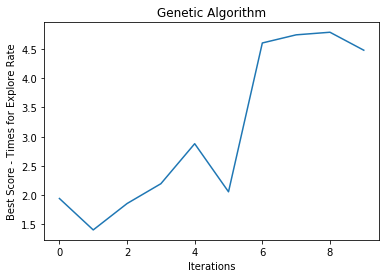

In [37]:
test_explore()

<h3>With this graph, the population size of 50 is used here where an explore rate of 0.1 is utilized that runs across 10 iterations. The mutation rate is 0.2 and the mutation range is 0.1. The number of iterations used for the algorithm is 10 in this test. The best solution score of the algorithm in this case is actually reached during the second iteration where the graph starts decreasing during the first iteration but rises after reaching the quickest time to perform the algortihm as the iterations progress due to the number of children in the population being 50 which peaks here at the end as the mutation range and rate are low in this first test. The number of children turns out to be 50 here too due to the child rate being 1 in the parameters class where the explore rate is quick at the start of the algorithm. However, the explore rate seems to have an impact on the efficiency of the algorithm as time progresses as the iteration is repeated multiple times where a higher best solution cost seems to be reached as the test progresses.<h3>

In [38]:
def test_explore_alt():
    times_for_explore_rate = []
    for i in range(100):
        pars.explore_rate = float(i) / 5.0
        times_for_explore_rate.append(test_genetic(10,prob,pars,0.1))
    plt.xlabel("Iterations")
    plt.ylabel("Best Score - Times for Explore Rate")
    plt.title("Genetic Algorithm")
    plt.plot(times_for_explore_rate)
    print("Cost {} Chromosome {}".format(best_solution.cost,best_solution.chromosome))

Cost 0.09596488175913645 Chromosome [ 3.20890869  3.2130373  -1.17579511 -1.23839172 -1.23416357]


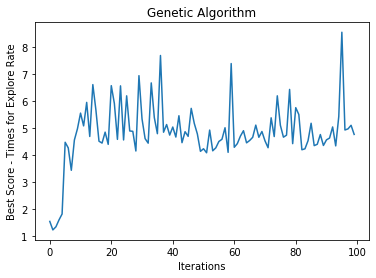

In [39]:
test_explore_alt()

<h3><h3>

In [40]:
best_solution.cost

0.09596488175913645

In [41]:
pars.explore_rate = 0.5

In [42]:
test_genetic(100,prob,pars,0.0001)

43.15901500000018

<h3>With the explore rate set at 0.5, the time it takes for 100 runs of the genetic algortihm is longer than when the explore rate is inputted as 0.1. This shows that a higher explore rate searches the search space as much as possible which would allow for an efficient way to serach for the perfect answer quickly. The exploration is done at the start of the algorithm. This makes it more harder to find the defining solution despite a chance that an answer can be found more quickly<h3>

In [43]:
test_genetic(10,prob,pars,0.0001)

3.5010707999999795

<h3>Surprisingly, the time to compute the genetic algortihm across ten runs occurs quicker than when the explore rate is set at 0.1 compared to 0.5. The value may be lower than 1 for example for the explore rate but it looks like the target could be reached within the optimal solution answer where the cost would be reached. A higher exploration rate <h3>

Explore Rate 0.0 
Time for Explore Rate [2.389752000000044]

Explore Rate 0.2 
Time for Explore Rate [2.389752000000044, 1.6834843000006003]

Explore Rate 0.4 
Time for Explore Rate [2.389752000000044, 1.6834843000006003, 2.0455889999993815]

Explore Rate 0.6 
Time for Explore Rate [2.389752000000044, 1.6834843000006003, 2.0455889999993815, 1.8001156000000265]

Explore Rate 0.8 
Time for Explore Rate [2.389752000000044, 1.6834843000006003, 2.0455889999993815, 1.8001156000000265, 2.484272499999861]

Explore Rate 1.0 
Time for Explore Rate [2.389752000000044, 1.6834843000006003, 2.0455889999993815, 1.8001156000000265, 2.484272499999861, 2.513980800000354]

Explore Rate 1.2 
Time for Explore Rate [2.389752000000044, 1.6834843000006003, 2.0455889999993815, 1.8001156000000265, 2.484272499999861, 2.513980800000354, 3.5097562000000835]

Explore Rate 1.4 
Time for Explore Rate [2.389752000000044, 1.6834843000006003, 2.0455889999993815, 1.8001156000000265, 2.484272499999861, 2.513980800000354, 

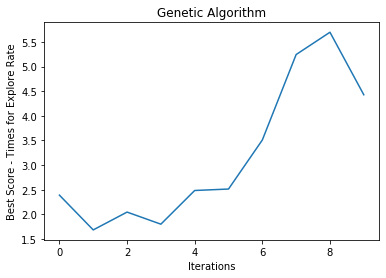

In [44]:
test_explore()

<h3>This time in the graph above, the population size of 50 is still used here where a different explore rate of 0.5 is utilized that runs across 10 iterations. The mutation rate is also 0.2 and the mutation range is 0.1. The number of iterations used for the algorithm is 100 in this test. The best solution score of the algorithm in this case is reached at iteration 1 once again. The graph starts decreasing before it rises as far as the 5th iteration and slides downwards before it rises again after the 6th iteration. The last score at the end is lower than the first explore rate test as it proves that a lower explore rate has a better chance of reaching the optimal solution depending on the test that is carried out. The maximum number of generations has been reached here where it goes as far as 10 rather than 100. This shows that a lower explore rate can ensure a better best fitness cost to acquire the optimal solution when the explore rate is lowered quicker at 0.1 which was tested earlier on 10 and 100 runs.<h3>

Cost 0.09596488175913645 Chromosome [ 3.20890869  3.2130373  -1.17579511 -1.23839172 -1.23416357]


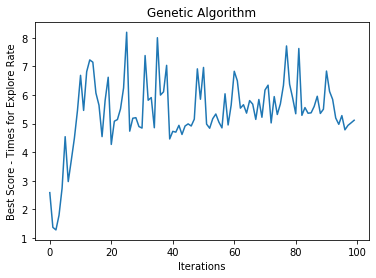

In [45]:
test_explore_alt()

In [ ]:
pars.number_of_iterations = 200

In [ ]:
test_genetic(10,prob,pars,0.0001)

<h3>With a higher number of iterations that is set at 200 when the iteration parameter is changed, it is clear that the time it takes for the genetic algorithm to be completed is much longer than the time it takes when 100 iterations are used. The time would be shorter if less iterations were used for the algorithm when the number of runs is put at 10 during the testing of the genetic algorithm. A graph for 200 iterations would take too long to form considering the iterations would be bigger and it would take a longer while to carry out the genetic algorithm than when the iterations is set at 100.<h3>

In [ ]:
test_explore()

In [ ]:
test_explore_alt()

In [ ]:
pars.mutation_range = 0.2

In [ ]:
test_genetic(100,prob,pars,0.0001)

The test for the number of runs which is set at 100 where the mutation range is set at 0.2 rather than 0.1. The greater mutation range would allow for determining the amount that the individual gene would change by. The time it takes for the genetic algorithm to last 100 runs here is higher when the higher mutation range is present as well as the updated explore rate of 0.5.

In [ ]:
test_genetic(10,prob,pars,0.0001)

The time taken for the algortihm to finish is longer than both of the explore rate tests which onvolvs 10 as the number of runs as the mutation range is 0.1 higher than the initial value when the mutation range was set at 0.1. In this case, the mutation range is set at 0.2 in addition to the updated parameters of the explore rate as mentioned earlier on. This higher exploration and mutation range coulkd bring us closer to the optimal solution when the explore rate is quick at the beginning but it slows down due to the higher best solution costs

In [ ]:
def test_mutation_range():
    times_for_mutation_range = []
    for i in range(10):
        pars.mutation_range = float(i) / 5.0
        times_for_mutation_range.append(test_genetic(10,prob,pars,0.1))   
    plt.xlabel("Iterations")
    plt.ylabel("Best Score - Times for Mutation Range")
    plt.title("Genetic Algorithm")
    plt.plot(times_for_mutation_range)
    print("Cost {} Chromosome {}".format(best_solution.cost,best_solution.chromosome))

In [ ]:
test_mutation_range()

When the mutation range is changed to 0.2 compared to the original value of 0.1, the graph shows that the starting score increases once the generations of the algorithm begins and the final score turns out to be lower than the starting score in iteration 10 where it ends. The score peaks at iteration 2 where the range of mutation to determine the amount that an individual gene will change by is higher. This would result in higher costs for the algorithm in general as the higher the fitness cost, the better the problem will be when attempting to reach the optimal solution. Once the peak occurs, a massive decrease occurs as the genes do not exactly vary afterwards where the graph seems to rise in every second iteration that represents the mutation range. It basically fluctuates as the offspring is created and emerges from the parents after crossover and mutation are applied. If more iterations were put in, the results could be expanded upon to form the optimal solution when modifying the parameters in the first part. This mutation range value is now edited alongside the explore rate.

In [ ]:
def test_mutation_range_alt():
    times_for_mutation_range = []
    for i in range(20):
        pars.mutation_range = float(i) / 5.0
        times_for_mutation_range.append(test_genetic(10,prob,pars,0.1))   
    plt.xlabel("Iterations")
    plt.ylabel("Best Score - Times for Mutation Range")
    plt.title("Genetic Algorithm")
    plt.plot(times_for_mutation_range)
    print("Cost {} Chromosome {}".format(best_solution.cost,best_solution.chromosome))

In [ ]:
test_mutation_range_alt()

The cost cannot be reached when the number of runs are tested out on whether it is 10 or 20 because the mutation range is set up at 0.2 compared to 0.1 which has a bigger chance of determining the amount that the individual gene would change by. The time it takes the mutation range to play a role in the genetic algorithm is significant where the graph fluctuates between high and low during the 20 times that the genetic algorithm is ran The higher mutation range along with the edited explore rate and the unchanged parameters at the start of the notebook in the parameters class causes the graph values to get much higher than 1 itself as seen in the first graph which was explained earlier.

In [ ]:
pars.number_of_children = self.number_in_population * self.child_rate

In [ ]:
pars.mutation_rate = 0.3

In [ ]:
test_genetic(100,prob,pars,0.1)

The mutation rate has changed to 0.3 in this test as it is clear that the test for the genetic algorithm which runs 10 times combined with the changed explore rate and mutation range from earlier allows for the ime to take longer to complete the algorithm. The higher the mutation rate, the better chance there is of reaching the perfect solution when the chances of mutation within an individual gene are higher.

In [ ]:
test_genetic(10,prob,pars,0.1)

The time for the number of runs taken when the genetic algorithm occurs is longer than the previous tests as the mutation rate is bigger than the original mutation rate value of 0.1. This is because the mutation rate here in this test has a higher probability that the individual gene will be mutated. This enables the test to be completed in a longer time period.

In [ ]:
def test_mutation_rate():
    times_for_mutation_rate = []
    for i in range(10):
        pars.mutation_rate = float(i) / 5.0
        times_for_mutation_rate.append(test_genetic(10,prob,pars,0.1))   
    plt.xlabel("Iterations")
    plt.ylabel("Best Score - Times for Mutation Rate")
    plt.title("Genetic Algorithm")
    plt.plot(times_for_mutation_rate)
    print("Cost {} Chromosome {}".format(best_solution.cost,best_solution.chromosome))

In [ ]:
test_mutation_rate()

In [ ]:
def test_mutation_rate_alt():
    times_for_mutation_rate = []
    for i in range(20):
        pars.mutation_rate = float(i) / 5.0
        times_for_mutation_rate.append(test_genetic(10,prob,pars,0.1))   
    plt.xlabel("Iterations")
    plt.ylabel("Best Score - Times for Mutation Rate")
    plt.title("Genetic Algorithm")
    plt.plot(times_for_mutation_rate)
    print("Cost {} Chromosome {}".format(best_solution.cost,best_solution.chromosome))

In [ ]:
test_mutation_rate_alt()

In [ ]:
pars.child_rate = 5

In [ ]:
test_genetic(100,prob,pars,0.1)

The child rate is set to 5 here where the time it takes to run the genetic algorithm here is slower than all of the previous tests where the number of runs was 100 because all of the changed parameters as tested out here for the first CA have a major impact on the cost of the algorithm where the higher the fitness cost, the closer we hopefully get to the optimal solution.

In [ ]:
test_genetic(10,prob,pars,0.1)

Meanwhile, the test by using the number of runs for the test of the genetic algorithm is surprisingly slower than the tests when the values of the mutation rate and range were performed and implemented. This is because the child rate is much higher than the child rate of 1. This allows for much more children to be born in every iteration when combined with the edited mutation rate and range as there is a greater possibility that the optimal solution would be reached when multiple iterations of the algorithm are carried out.

In [ ]:
def test_child_rate():
    times_for_child_rate = []
    for i in range(30):
        pars.child_rate = float(i) / 5.0
        times_for_child_rate.append(test_genetic(10,prob,pars,0.1))   
    plt.xlabel("Iterations")
    plt.ylabel("Best Score - Times for Child Rate")
    plt.title("Genetic Algorithm")
    plt.plot(times_for_child_rate)
    print("Cost {} Best Solution Chromosome {}".format(best_solution.cost,best_solution.chromosome))

In [ ]:
test_child_rate()

In [ ]:
def test_child_rate_alt():
    times_for_child_rate = []
    for i in range(10):
        pars.child_rate = float(i) / 5.0
        times_for_child_rate.append(test_genetic(10,prob,pars,0.1))   
    plt.xlabel("Iterations")
    plt.ylabel("Best Score - Times for Child Rate")
    plt.title("Genetic Algorithm")
    plt.plot(times_for_child_rate)
    print("Cost {} Chromosome {}".format(best_solution.cost,best_solution.chromosome))

In [ ]:
test_child_rate_alt()

This algortihm does not look close to the optimal solution where a mean distribution would occur if the perfect solution is reached. The graph naturally increases and decreases after the halfway mark of the testing of the algorithm. It may fluctuate at the beginning of the test with the graph figures as the test is appended to try and accommodate for the best score so far in the algorithm. More tweaking of the parameters would probably lead to a much improved solution which can be fixed when the algortihm is changed and edited soon.

In [ ]:
pars.number_in_population = 20

In [ ]:
def test_number_in_population():
    times_for_population_no = []
    for i in range(10):
        pars.number_in_population = float(i) / 5.0
        times_for_population_no.append(test_genetic(10,prob,pars,0.1))   
    plt.xlabel("Iterations")
    plt.ylabel("Best Score - Times for Population Numbers")
    plt.title("Genetic Algorithm")
    plt.plot(times_for_population_no)
    print("Cost {} Chromosome {}".format(best_solution.cost,best_solution.chromosome))

In [ ]:
test_number_in_population()

In [ ]:
final_pop[0].chromosome

In [ ]:
q = parameters()

In [ ]:
pop = run_genetic(p1, q, 0.0001)

In [ ]:
pop, best_soln = run_genetic(p1,q,0.0001)

In [ ]:
pop[5].chromosome

In [ ]:
best_soln.chromosome

In [ ]:
plt.plot(best_solution.chromosome)

In [ ]:
def run_genetic_alt(problem, parameters, max_error):
    
    #read problem
    #Fitness Function
    cost_function = problem.cost_function
    
    #read parameters
    number_in_population = parameters.number_in_population
    number_of_iterations = parameters.number_of_iterations
    number_of_children = parameters.number_of_children
    explore_rate = parameters.explore_rate
    mutation_rate = parameters.mutation_rate
    mutation_range = parameters.mutation_range
    
    #placeholder for best solution
    best_solution = deepcopy(individual())
    best_solution.cost = np.infty
    
    # Placeholder for best cost at each iteration
    best_costs = []
    
    population = []
    
    #initialize population for the above problem. i.e. generate random individuals
    for i in range(number_in_population):
        new_individual = individual(problem)
        population.append(new_individual)
        if new_individual.cost < best_solution.cost:#Cost = Fitness
            best_solution = deepcopy(new_individual)
            
    for iteration in range(number_of_iterations):      
        # generate a new population of children
        children = []
        
        # How Many Children
        while len(children) < number_of_children:
            
        # Select 2 Parents
            parent1_index, parent2_index = choose_distinct_pair_from(number_in_population)
            parent_1 = population[parent1_index]
            parent_2 = population[parent2_index]
            
        # Use crossover to produce 2 children
            child_1,child_2 = parent_1.crossover(parent_2, explore_rate)
            
        # Mutate these children
            child_1.mutate(mutation_rate, mutation_range)
            child_2.mutate(mutation_rate, mutation_range)
            
        # calculate costs (Fitness) for these children
            child_1.cost = cost_function(child_1.chromosome)
            child_2.cost = cost_function(child_2.chromosome)
                
        # add to the children population
            children.append(child_1)
            children.append(child_2)
            
        #merge parent and child populations    
        population += children
        
        #Sort into ascending order of cost
        population = sorted(population, key = lambda x: x.cost)
        
        #Select population next iteration
        population = population[0:number_in_population]
        
        #update best solution - Fitness
        if population[0].cost < best_solution.cost:
            best_solution = deepcopy(population[0])
            
        #print iteration results
        #print("Iteration/Generation {} Cost/Fitness {}".format(iteration, best_solution.cost))
        #best_costs.append(best_solution.cost)
        #output results ?? class/struct/ best solution/ population?
        if best_solution.cost < max_error:
            #print("Stopped at {} Iterations".format(iteration))
            break
            
    #plt.semilogy(best_costs)
    #plt.xlabel("Iterations")
    #plt.ylabel("Best Cost")
    #plt.title("Genetic Algorithm \n" + parameters.to_string())
    #print("Solution Score {}".format(best_solution.chromosome))
    return population, best_solution      